In [9]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

In [10]:
from pylab import *
import matplotlib.pyplot as plt
from collections import OrderedDict
import pandas as pd

In [11]:
# skip site cert check
#http://stackoverflow.com/questions/27835619/ssl-certificate-verify-failed-error
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
#ssl.create_default_context(capath=False)
Cluster = pd.read_csv(
    "https://hpc-forge.cineca.it/files/Visualization_School/public/20150315.jobs",
    sep=';',
    header=None,
    names=['date',
           'jobid',
           'wcl',
           'cpu',
           'aff',
           'mem',
           'queue',
           'elapsed',
           'waited',
           'status',
           'account',
           'username','unknown'],
    parse_dates=['date'])

#print Cluster

xyvalues = OrderedDict([
        ('all',Cluster[['elapsed','waited']].values)
        ])

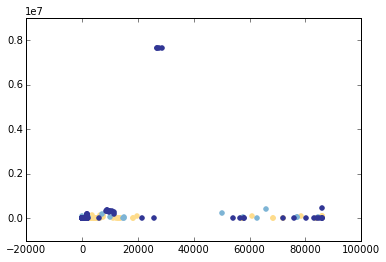

In [12]:
sel = Cluster[['elapsed','waited', "queue"]]
#from bokeh.sampledata.iris import flowers
#print flowers
#print sel

#setup = (flowers, 'species',"petal_length","petal_width")
setup = (sel, 'queue',"elapsed","waited")

grouped=setup[0].groupby(setup[1])
#n_group = len(grouPed)
pdict = OrderedDict()
hist_data = []
     


fig, ax = plt.subplots()


count = 0;
c = 0;
for q in grouped.groups:
    c = c + 1
    count = count + 100
    group = grouped.get_group(q)[[setup[2],setup[3]]]    

    #xx=grouped.get_group(q)[[setup[2]]].values
    #yy=grouped.get_group(q)[[setup[3]]].values
    xx=group[[setup[2]]].values
    yy=group[[setup[3]]].values

    #print plt.cm.RdYlBu(count)
    ax.scatter(x=xx, y=yy, color=plt.cm.RdYlBu(count))
    #pdict[q]=group.values
    #pdict[q]=group[[setup[2]]].values
    #print pdict[q]
    #print pdict[q]
    
plt.show()

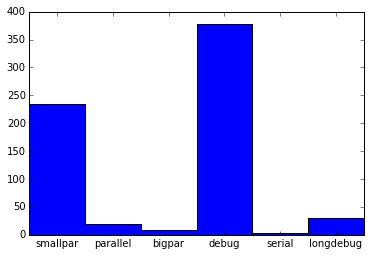

In [13]:
from collections import Counter
sel = Cluster[['elapsed','waited', "queue"]]
#from bokeh.sampledata.iris import flowers
#print flowers
#print sel

#setup = (flowers, 'species',"petal_length","petal_width")
setup = (sel, 'queue',"elapsed","waited")

grouped=setup[0].groupby(setup[1])
#n_group = len(grouPed)
pdict = OrderedDict()
hist_data = []

count = 0;
c = 0;
for q in grouped.groups:
    c = c + 1
    count = count + 100
    group = grouped.get_group(q)[[setup[2],setup[3]]]    

    #xx=grouped.get_group(q)[[setup[2]]].values
    #yy=grouped.get_group(q)[[setup[3]]].values
    xx=group[[setup[2]]].values
    yy=group[[setup[3]]].values

    #print plt.cm.RdYlBu(count)
    #ax.scatter(x=xx, y=yy, color=plt.cm.RdYlBu(count))
    #pdict[q]=group.values
    #pdict[q]=group[[setup[2]]].values
    #print pdict[q]
    #print pdict[q]
    #hist_data.append(len(grouped.get_group(q)))
    hist_data.append(q)
    
hist_queue =  Cluster['queue'].tolist()
#print hist_queue

labels, values = zip(*Counter(hist_queue).items())
#print labels
#print values

indexes = np.arange(len(labels))
#print indexes
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

plt.show()